In [1]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


V3: multi-add task with noise

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'addtask_04_2025_tests'

dataset = 'multiaddtask' # episodic by default
#dataset = 'addtask' 

num_epochs = 3000 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   num_workers=0, batch_size=batch_size, 
                   dataset_size = dataset_size,
                   total_time=time_window)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

torch.Size([128, 50, 3])
torch.Size([128, 5, 1])


In [3]:
# import torch
# print(img[0])
# print((torch.sum(img[0])-5)/(0.9*5.0))
# print(lbl[0])


Training multi-add memory task (two sets)

In [4]:
num_h = 4

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
snn_rnn.to(device)

extra_kwargs = {'delay_range':(40, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
snn_rd.to(device)

Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=4, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=160, out_features=4, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=4, out_features=1, bias=False)
    )
  )
)

In [5]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)

Epoch [1/1], learning_rates 0.001000, 1.000000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [300/3000], Loss: 1.31302
Step [600/3000], Loss: 1.29618
Step [900/3000], Loss: 1.28289
Step [1200/3000], Loss: 1.34255
Step [1500/3000], Loss: 1.30665
Step [1800/3000], Loss: 1.34013
Step [2100/3000], Loss: 1.19483
Step [2400/3000], Loss: 1.24341
Step [2700/3000], Loss: 1.21013
Step [3000/3000], Loss: 1.31217
384000
Time elasped: 584.0851941108704
Epoch [1/1], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.12868
Step [600/3000], Loss: 0.04360
Step [900/3000], Loss: 0.02855
Step [1200/3000], Loss: 0.02362
Step [1500/3000], Loss: 0.02778
Step [1800/3000], Loss: 0.06508
Step [2100/3000], Loss: 0.02603
Step [2400/3000], Loss: 0.02083
Step [2700/3000], Loss: 0.02589
Step [3000/3000], Loss: 0.02106
384000
Time elasped: 522.9013164043427
Epoch [1/1], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 1.28704
Step [600/3000], Loss: 1.23338
Step [900/3000], Loss: 1.29350
Step [1200/3000], Loss: 1.24300
Step [1500/3000], Loss: 1.24571
Step [1800/3000], Loss: 1.25786
Step 

Text(0.5, 1.0, 'train loss')

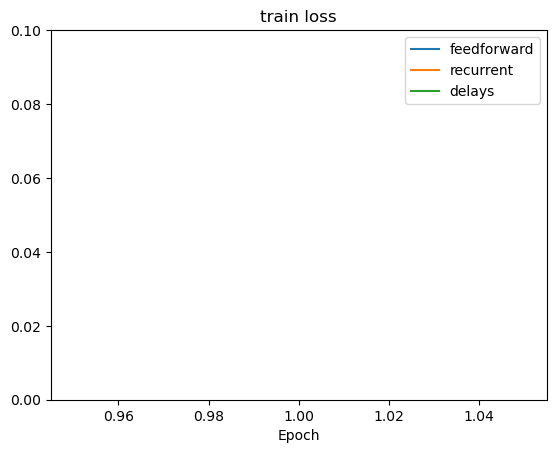

In [6]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.1)
plt.title('train loss')

In [7]:
snn_f.debug = True
snn_rnn.debug = True
snn_rd.debug = True
snn_f.init_state_logger()
snn_rnn.init_state_logger()
snn_rd.init_state_logger()

from snn_delays.utils.train_utils_refact_minimal import propagate_batch_simple
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
_, labels_rnn = propagate_batch_simple(snn_rnn, test_loader)
_, labels_rd = propagate_batch_simple(snn_rd, test_loader)

In [8]:
ref_mf = labels_mf[:,:int(0.1*time_window),0].T.cpu().numpy()
out_mf = snn_f.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window),0].T.cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rd = labels_rd[:,:int(0.1*time_window),0].T.cpu().numpy()
out_rd = snn_rd.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

(5, 50)
(5, 50)
1.1306666
(5, 50)
(5, 50)
0.11720899
(5, 50)
(5, 50)
1.1324444


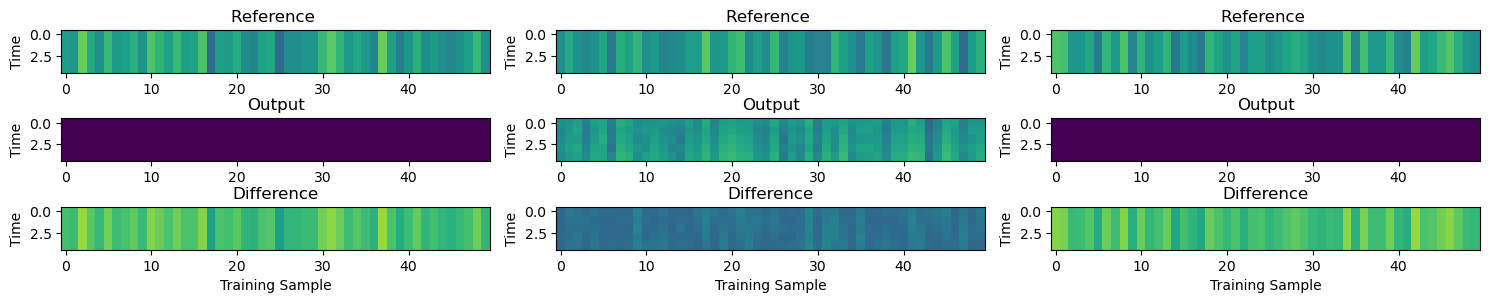

In [9]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

def plot_add_task(output, reference, axes=None, name=''):
    # ref = reference
    # out = output



    # diff = ref - out[:, :, 0]

    # print(np.mean(diff))


    ns = 50 # num samples to display for better viz

    ref = reference[:, :ns]
    out = output[:, :ns, 0]

    print(ref.shape)
    print(out.shape)

    diff = abs(ref - out)

    print(np.mean(diff))


    if axes is None:
        fig, axes = plt.subplots(3, 1, figsize=(5, 10))  # Create a new figure if axes not provided

    axes[0].imshow(ref, vmin=0, vmax=2)
    axes[0].set_title('Reference '+name)
    axes[0].set_ylabel('Time')

    axes[1].imshow(out, vmin=0, vmax=2)
    axes[1].set_title('Output')
    axes[1].set_ylabel('Time')

    axes[2].imshow(diff, vmin=-1.0, vmax=2.0)
    axes[2].set_title('Difference')
    axes[2].set_ylabel('Time')
    axes[2].set_xlabel('Training Sample')

    return axes  # Return the axes to be used in an external figure


plot_add_task(out_mf, ref_mf, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, axes[:, 1])  
plot_add_task(out_rd, ref_rd, axes[:, 2])  

plt.tight_layout()
plt.show()